In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_test_y=pd.read_csv('gender_submission.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.drop(['PassengerId','Name','Ticket','Fare','Embarked'],axis=1,inplace=True)

In [7]:
df_train.loc[df_train['Sex']=='male','Sex']=1
df_train.loc[df_train['Sex']=='female','Sex']=0

In [8]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

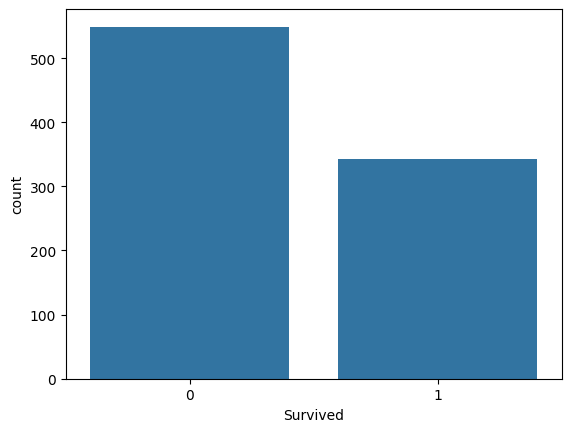

In [9]:
sns.countplot(data=df_train,x='Survived')

In [10]:
df_train.corr(numeric_only=True)['Survived'].sort_values()

Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Survived    1.000000
Name: Survived, dtype: float64

<Axes: >

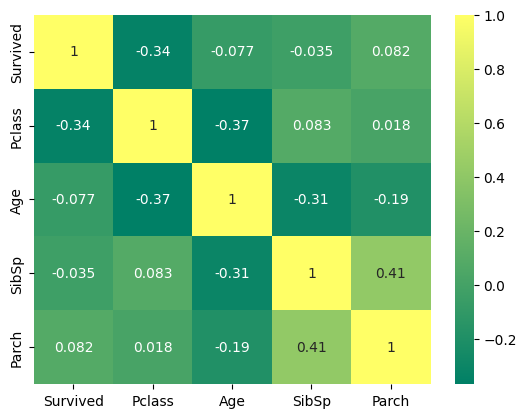

In [11]:
sns.heatmap(df_train.corr(numeric_only=True),annot=True,cmap='summer')

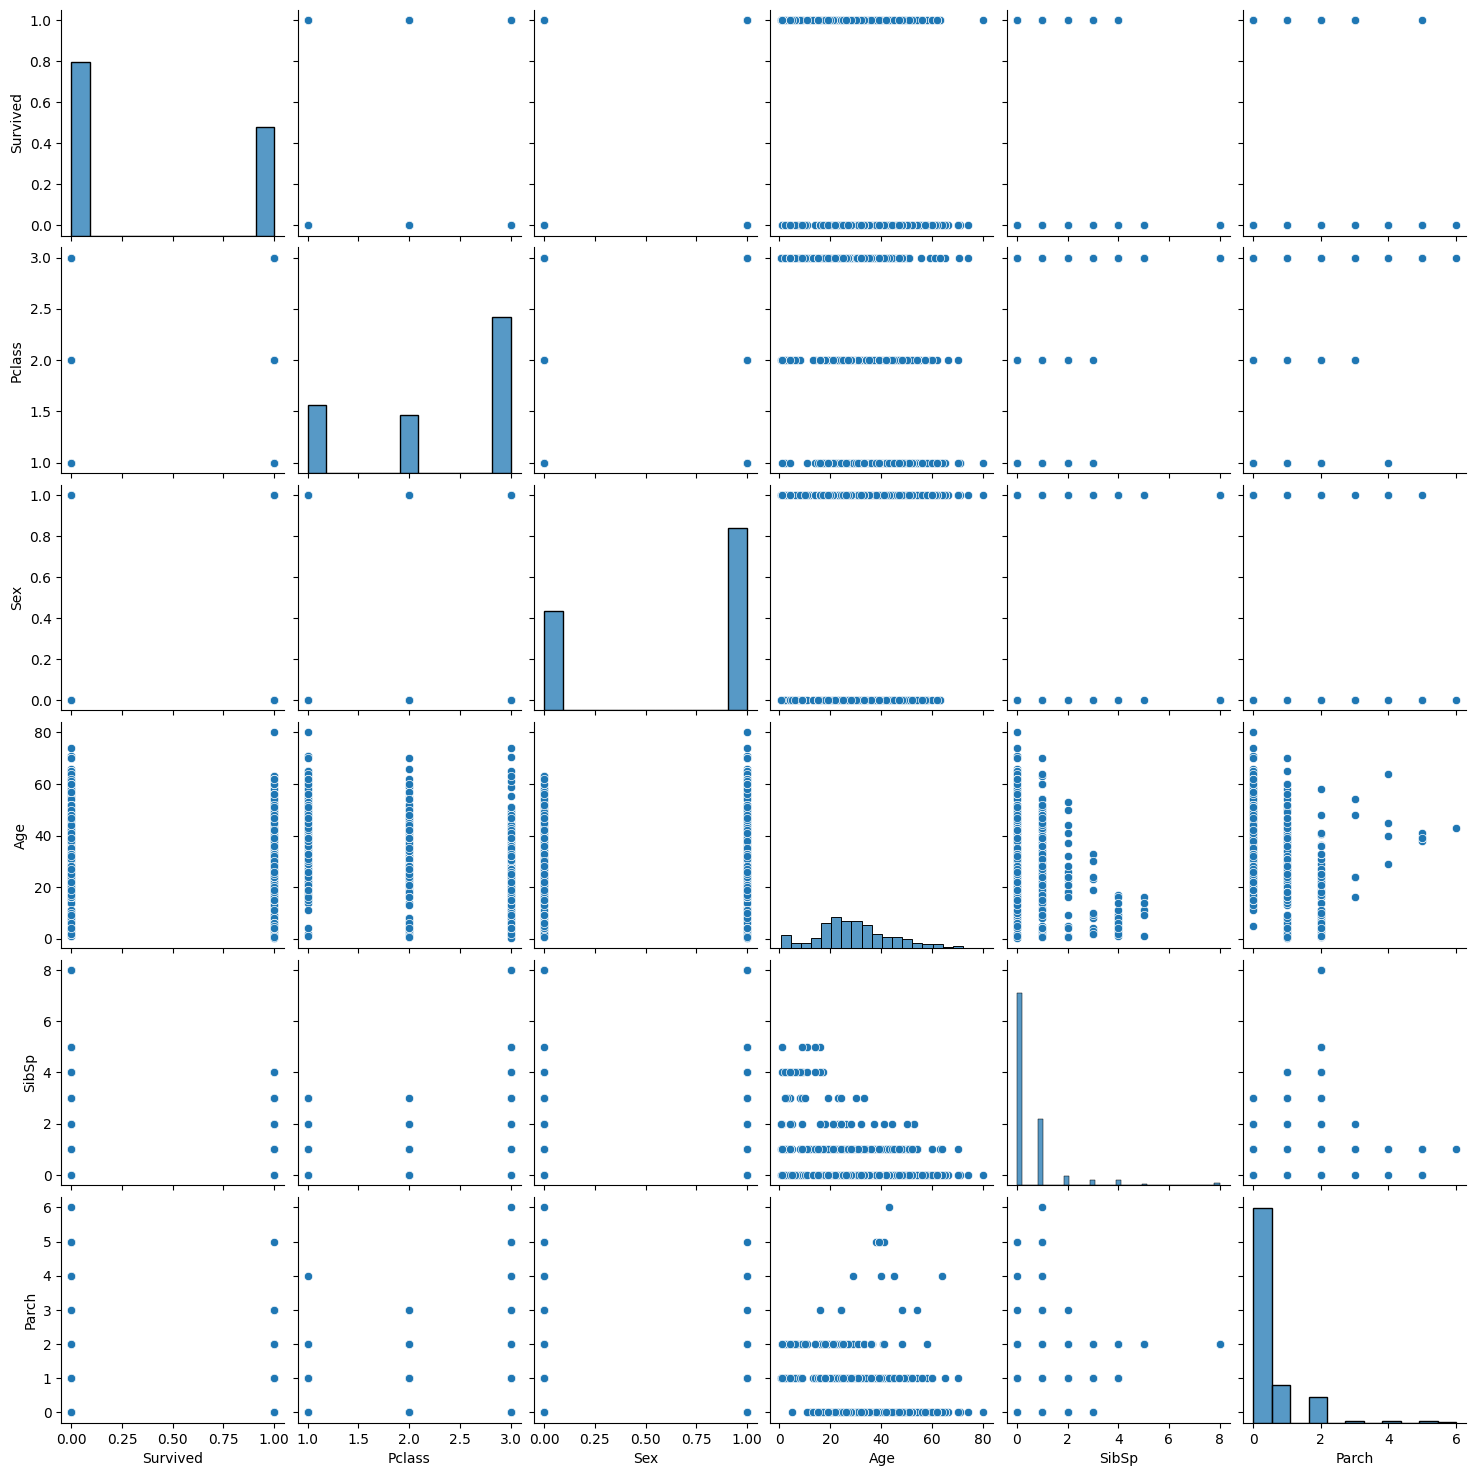

In [12]:
sns.pairplot(data=df_train)

In [13]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
dtype: int64

In [14]:
100*(df_train.isnull().sum()/len(df_train))

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Cabin       77.104377
dtype: float64

In [15]:
def missing_percent(df):
    nan_percent=100*(df.isnull().sum()/len(df))
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [16]:
nan_percent=missing_percent(df_train)


([0, 1], [Text(0, 0, 'Age'), Text(1, 0, 'Cabin')])

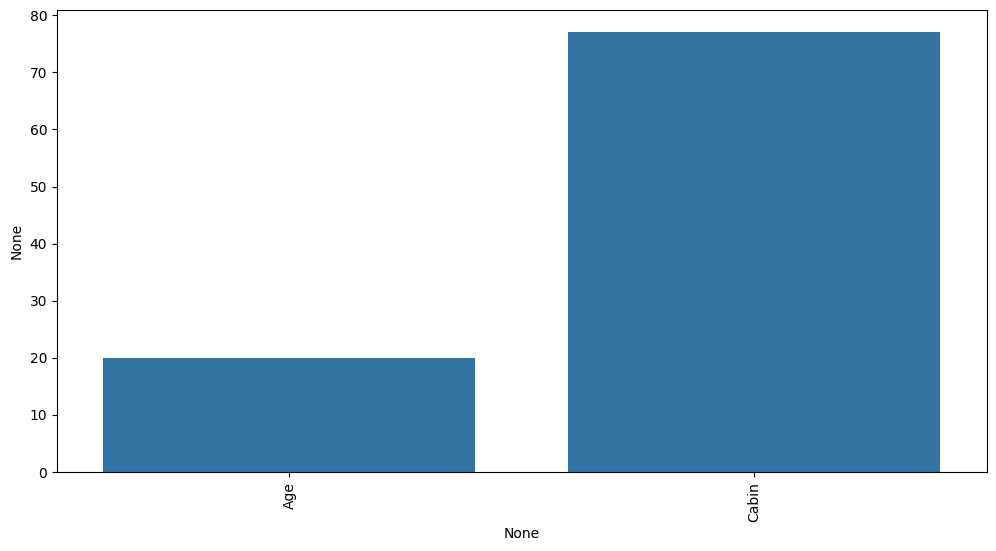

In [17]:
nan_percent=missing_percent(df_train)
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

In [18]:
df_train['Age']=df_train['Age'].fillna(df_train
                                       ['Age'].median())
df_train.isnull().sum()
        

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Cabin       687
dtype: int64

([0], [Text(0, 0, 'Cabin')])

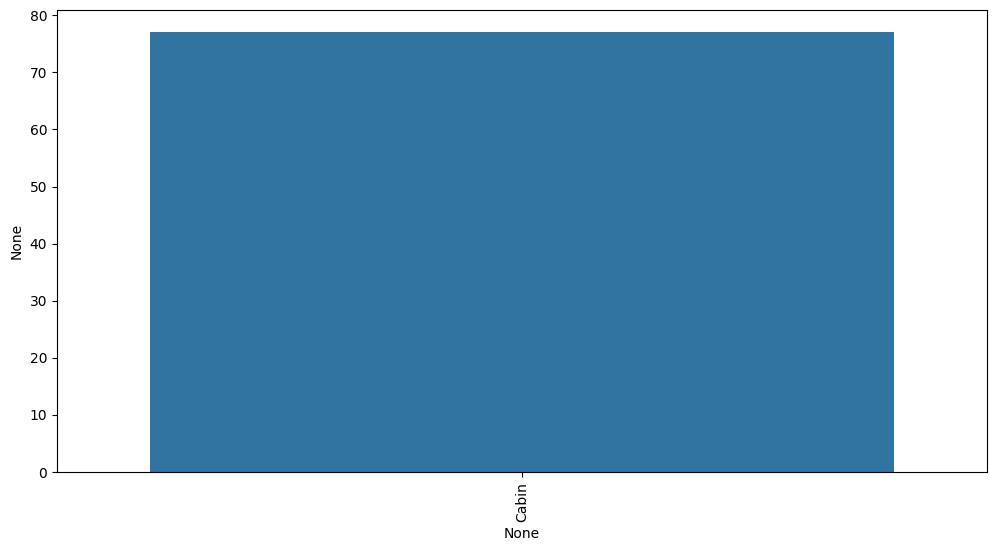

In [19]:
nan_percent=missing_percent(df_train)
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

In [20]:
df_train=df_train.drop(['Cabin'],axis=1)

In [21]:
nan_percent=missing_percent(df_train)

In [22]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [24]:
df_train.shape

(891, 6)

In [25]:
df_train['Survived']=df_train['Survived'].apply(str)
df_train['Pclass']=df_train['Pclass'].apply(str)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 41.9+ KB


In [27]:
df_train_num=df_train.select_dtypes(exclude='object')
df_train_obj=df_train.select_dtypes(exclude='object')

In [28]:
df_train_obj.drop('Survived',axis=1,inplace=True)

KeyError: "['Survived'] not found in axis"

In [ ]:
df_train_obj=pd.get_dummies(df_train_obj,drop_first=True)